In [6]:
import json
import nltk
import gensim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.preprocessing import normalize

# 1. Read the JSON file using pandas
file_path = 'C:/AI/LazyNlpDL/machine_learning_examples/Large_files/Reviews_Cell_Phones_and_Accessories_5.json'

# Read the JSON into a DataFrame (adjust the 'lines' parameter if needed)
df = pd.read_json(file_path, encoding='utf-8', lines=True)

# Display the first few rows of the DataFrame to understand its structure
print(df.head())



       reviewerID        asin      reviewerName helpful  \
0  A30TL5EWN6DFXT  120401325X         christina  [0, 0]   
1   ASY55RVNIL0UD  120401325X          emily l.  [0, 0]   
2  A2TMXE2AFO7ONB  120401325X             Erica  [0, 0]   
3   AWJ0WZQYMYFQ4  120401325X                JM  [4, 4]   
4   ATX7CZYFXI1KW  120401325X  patrice m rogoza  [2, 3]   

                                          reviewText  overall  \
0  They look good and stick good! I just don't li...        4   
1  These stickers work like the review says they ...        5   
2  These are awesome and make my phone look so st...        5   
3  Item arrived in great time and was in perfect ...        4   
4  awesome! stays on, and looks great. can be use...        5   

                                     summary  unixReviewTime   reviewTime  
0                                 Looks Good      1400630400  05 21, 2014  
1                      Really great product.      1389657600  01 14, 2014  
2                         

In [7]:
# 2. Extract reviews and preprocess the text
reviews = df['reviewText'].dropna().tolist()

# Tokenize the reviews
nltk.download('punkt')
processed_reviews = [word_tokenize(review.lower()) for review in reviews]

# remove stop words
stopwords = set(nltk.corpus.stopwords.words('english'))
processed_reviews = [
    [word for word in review if word.isalnum() and word not in stopwords] 
    for review in processed_reviews
]



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mspun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
# 3. Train the Word2Vec model
model = Word2Vec(sentences=processed_reviews, vector_size=100, window=5, min_count=5, workers=4)

# 4. Dimensionality reduction using PCA on the trained model
words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])

# Reducing to 2 dimensions using PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Normalize the 2D vectors for better visualization
word_vectors_2d = normalize(word_vectors_2d)



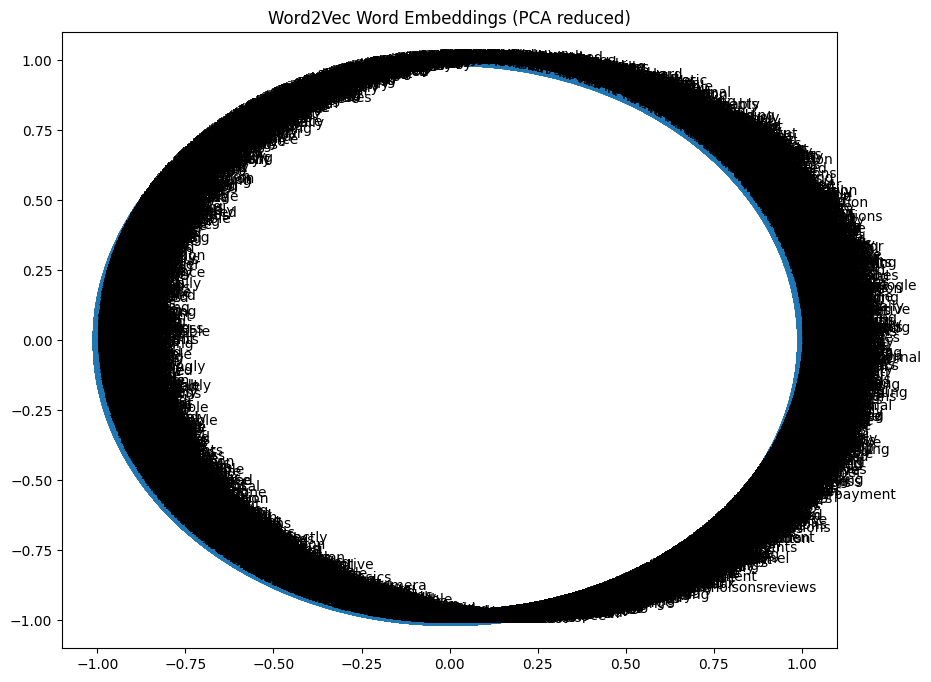

In [9]:
# 5. Plot the word embeddings using matplotlib
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

# Annotate each point with the corresponding word
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.title('Word2Vec Word Embeddings (PCA reduced)')
plt.show()

In [10]:
words_to_check = ['battery', 'camera', 'performance', 'screen', 'design', 'price', 'durability', 'storage', 'speed', 'support']


In [11]:
similarity_results = {}

for word in words_to_check:
    if word in model.wv:
        similarity_results[word] = model.wv.most_similar(word, topn=5)

# Print the most similar words for each selected word
for word, similar_words in similarity_results.items():
    print(f"Most similar words to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"  {similar_word} (similarity: {similarity:.4f})")
    print()


Most similar words to 'battery':
  batter (similarity: 0.9269)
  batt (similarity: 0.7868)
  batteries (similarity: 0.7304)
  juice (similarity: 0.5844)
  cycle (similarity: 0.5724)

Most similar words to 'camera':
  lense (similarity: 0.7171)
  8mp (similarity: 0.7045)
  5mp (similarity: 0.7030)
  lens (similarity: 0.6893)
  dslr (similarity: 0.6866)

Most similar words to 'performance':
  ratio (similarity: 0.6096)
  results (similarity: 0.5902)
  efficiency (similarity: 0.5867)
  experience (similarity: 0.5632)
  dramatically (similarity: 0.5631)

Most similar words to 'screen':
  glass (similarity: 0.7122)
  screens (similarity: 0.6380)
  film (similarity: 0.6339)
  scree (similarity: 0.6337)
  sceen (similarity: 0.5943)

Most similar words to 'design':
  styling (similarity: 0.6718)
  appearance (similarity: 0.6592)
  aesthetics (similarity: 0.6445)
  aesthetic (similarity: 0.6324)
  streamlined (similarity: 0.6286)

Most similar words to 'price':
  cost (similarity: 0.6714)
  pri